In [208]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import functools

In [209]:
Product_TPI = "../../../datos/CM01_1/Product_TPI_2021-03-01.csv"
Product_TPI_dt = pd.read_csv(Product_TPI)
Product_TPI_filtered = Product_TPI_dt[Product_TPI_dt['value'].notna()]

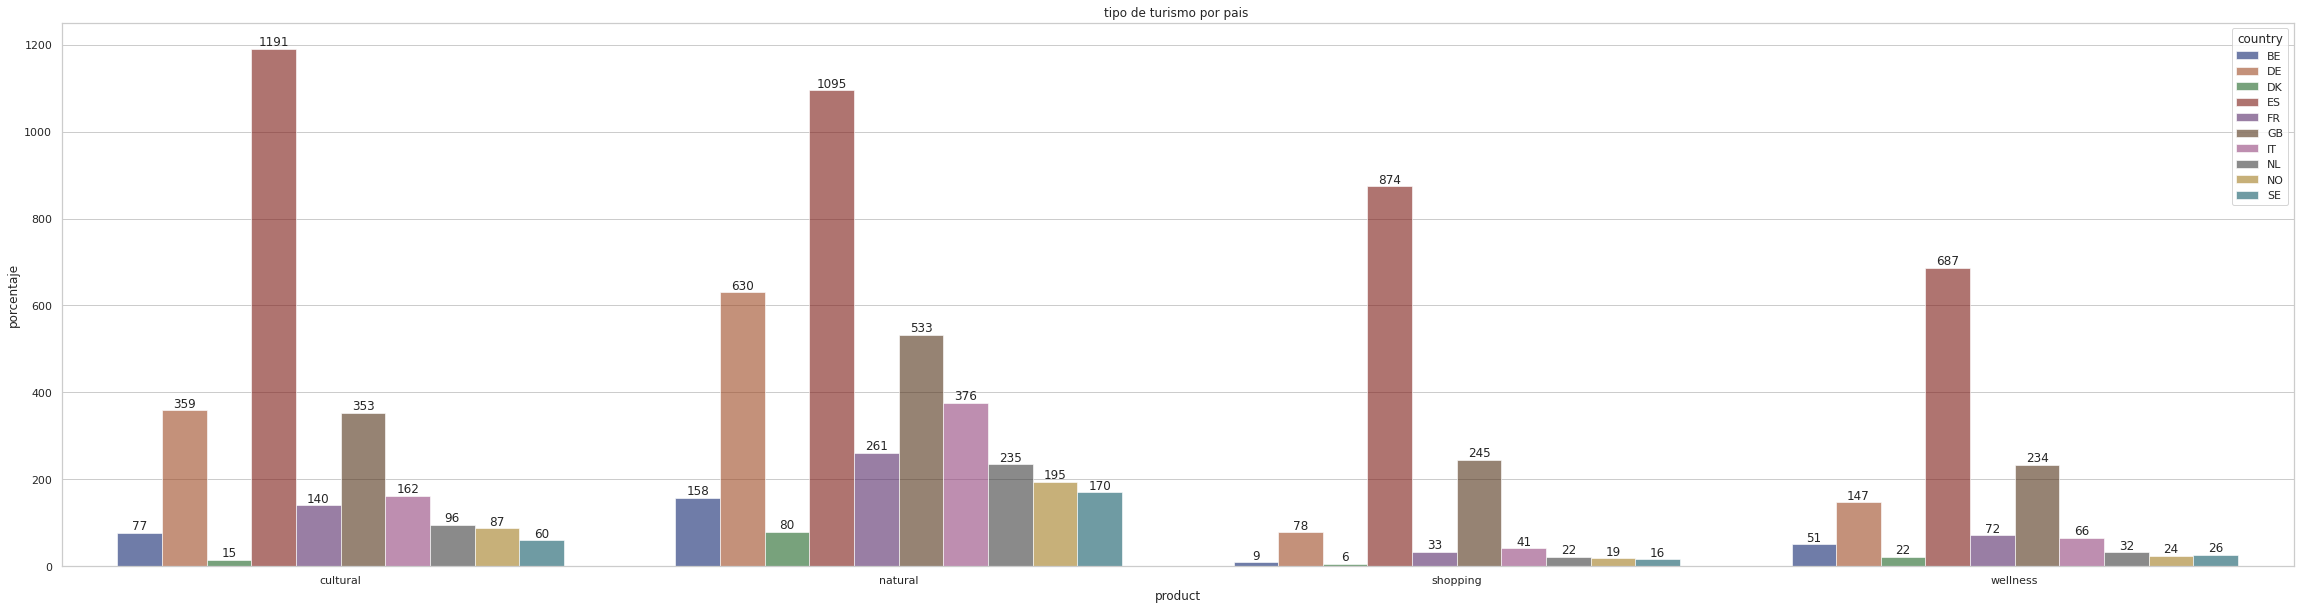

In [210]:
df = Product_TPI_filtered.groupby(['country','product']).agg(porcentaje=('value', 'count'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(40,10))
  
ax= sns.barplot(x="product",
           y="porcentaje",
           hue="country",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('tipo de turismo por pais ')

for container in ax.containers:
    ax.bar_label(container)

In [211]:
product_ages = "../../../datos/CM01_1/product_ages_2021-03-01.csv"
product_ages_dt = pd.read_csv(product_ages)

product_ages_filtered = product_ages_dt[(product_ages_dt != 0).all(1)]


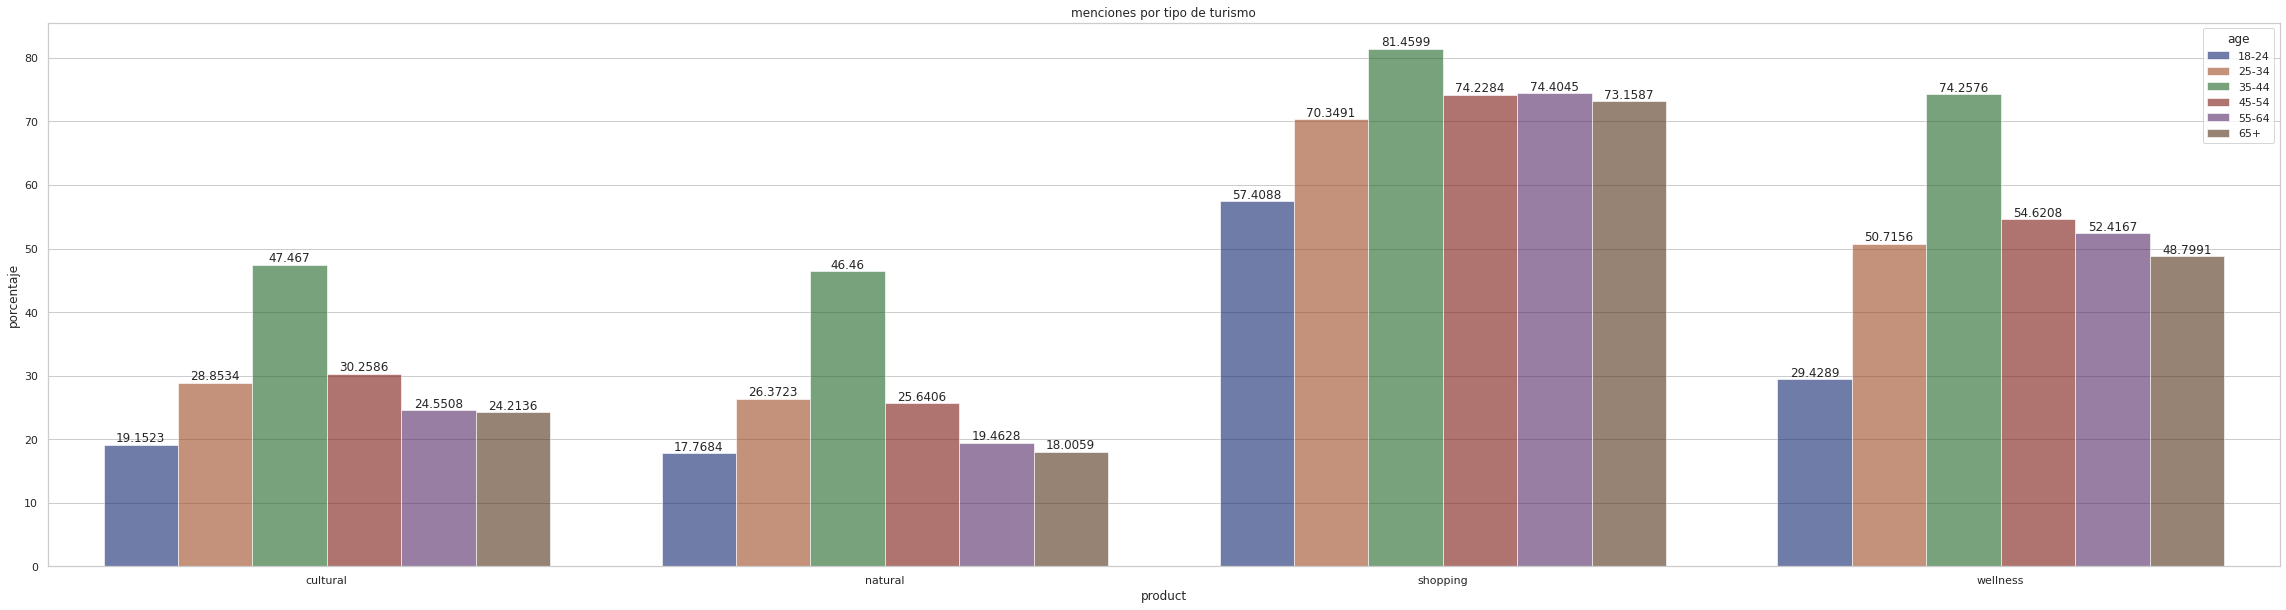

In [212]:
df =product_ages_filtered.groupby([ 'age', 'product']).agg(porcentaje=('mentions', 'mean'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(40,10))
  
ax= sns.barplot(x="product",
           y="porcentaje",
           hue="age",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('menciones por tipo de turismo')

for container in ax.containers:
    ax.bar_label(container)

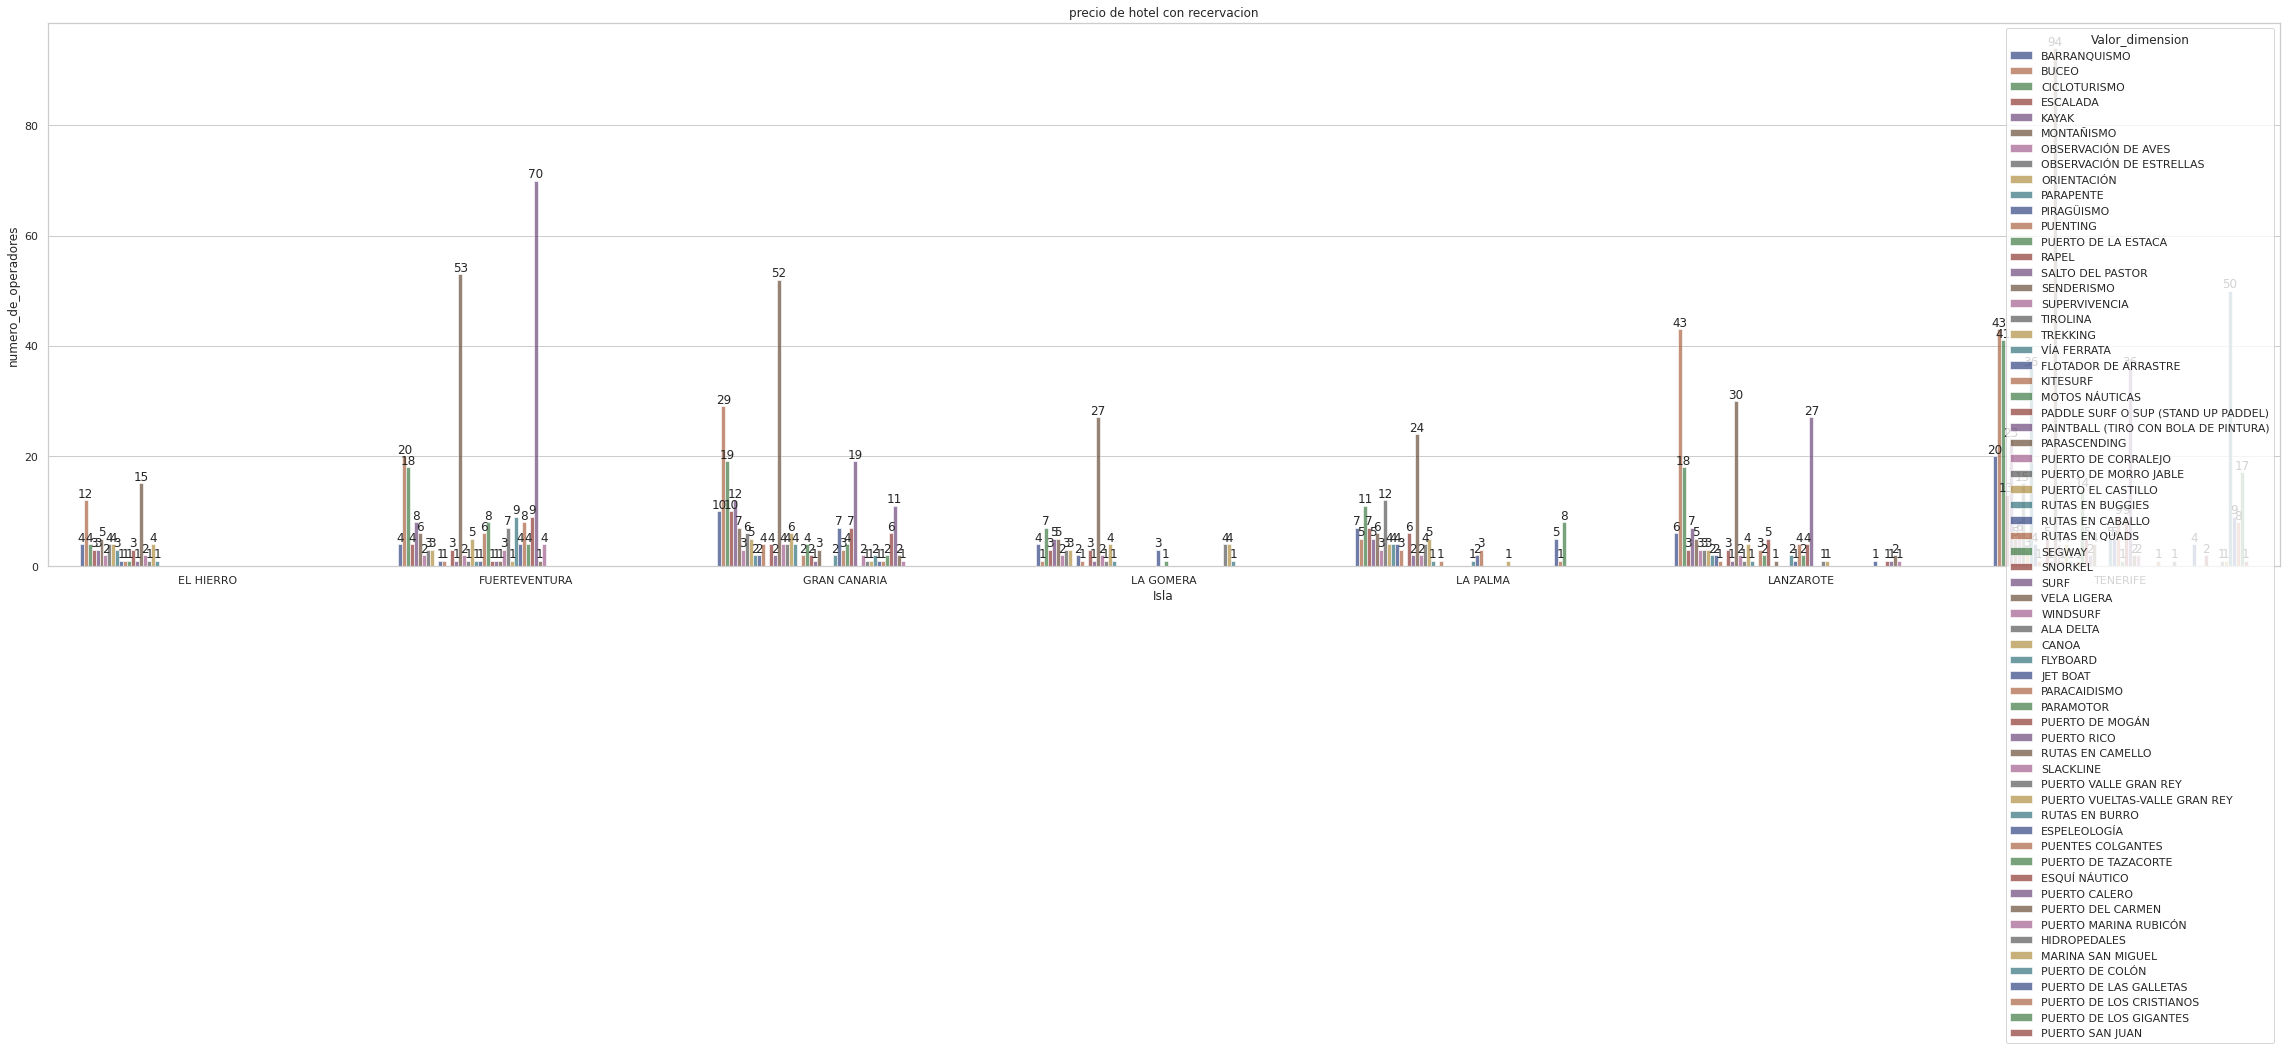

In [234]:
maestro_cm33 = "../../../datos/CM33/maestro_cm33.csv"
maestro_cm33_dt = pd.read_csv(maestro_cm33)
maestro_cm33_dt.head(20)



df = maestro_cm33_dt.groupby(['Isla','Valor_dimension']).agg(numero_de_operadores=('Operador','count'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(40,10))
  
ax= sns.barplot(x="Isla",
           y="numero_de_operadores",
           hue="Valor_dimension",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('precio de hotel con recervacion')

for container in ax.containers:
    ax.bar_label(container)